In [ ]:
from tensorflow import keras
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

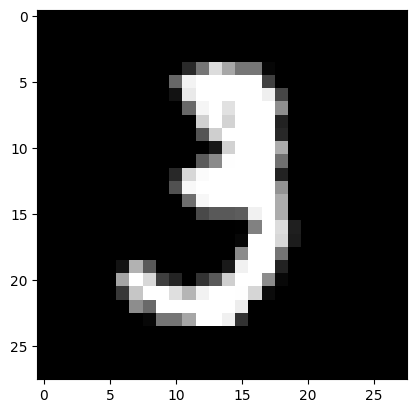

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10], cmap='gray')
plt.show()

# Preprocessing

In [ ]:
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255

In [ ]:
x_train.shape

(60000, 28, 28, 1)

# Model Definition

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid',
                              activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,770,634 (10.57 MB)

 Trainable params: 2,770,634 (10.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8765 - loss: 0.4340 - val_accuracy: 0.9782 - val_loss: 0.0743
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9823 - loss: 0.0621 - val_accuracy: 0.9806 - val_loss: 0.0607
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9883 - loss: 0.0376 - val_accuracy: 0.9811 - val_loss: 0.0580
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9936 - loss: 0.0231 - val_accuracy: 0.9833 - val_loss: 0.0560
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9960 - loss: 0.0144 - val_accuracy: 0.9838 - val_loss: 0.0511
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9980 - loss: 0.0090 - val_accuracy: 0.9853 - val_loss: 0.0503
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9986 - loss: 0.0058 - val_accuracy: 0.9857 - val_loss: 0.0503
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0

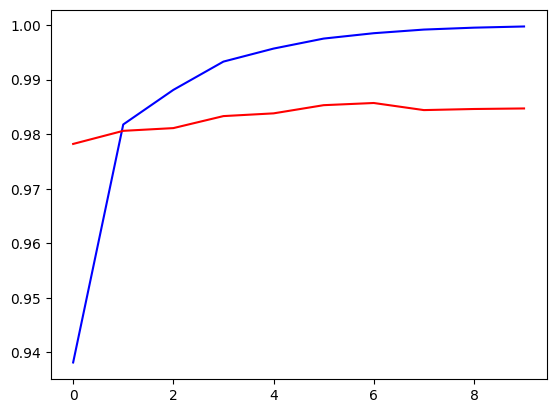

In [ ]:
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='red')